In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [15]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [16]:
from sklearn.model_selection import train_test_split
X=df[['feature1','feature2']].values
y=df['price'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
X_train.min(),X_train.max()

(np.float64(0.0), np.float64(1.0))

## We set up a base Sequential model and add layers to it. 
## For example, we can add a Dense layer. The Dense layer is a regular, densely connected neural network layer, meaning every neuron is connected to every other neuron in the next layer. The two main parameters for Dense are units (number of neurons) and activation (the activation function for the neurons, such as 'relu' or 'sigmoid').


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## In this example, the first layer has four neurons with a rectified linear unit activation, the second layer has two neurons with the same activation, and the final output layer has one neuron. The activation function for the last layer can be omitted or set as needed.

In [22]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

## The final output layer should match the prediction task. For this dataset, we are predicting a single numerical price value, so the last layer should have one neuron to output the price. This output will be compared to the true price using a loss function.

In [23]:
model.compile(optimizer='rmsprop', loss='mse')

## An epoch is defined as one pass over the entire dataset. Setting epochs=250 means the model will train over the data 250 times. The verbose parameter controls the amount of output during training. A higher verbose value gives more information, while 0 suppresses output. It is recommended to set verbose to a value other than 0 to monitor training progress.

In [24]:
model.fit(x=X_train, y=y_train, epochs=250, verbose=1)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 256138.6250   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255949.1719 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255754.8125 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255539.5469 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255302.5312 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255043.6562 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254763.8125 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254462.0781 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254139.6406 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253796.3906 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253432.4531 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253047.3594 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252641.0469 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

<Axes: >

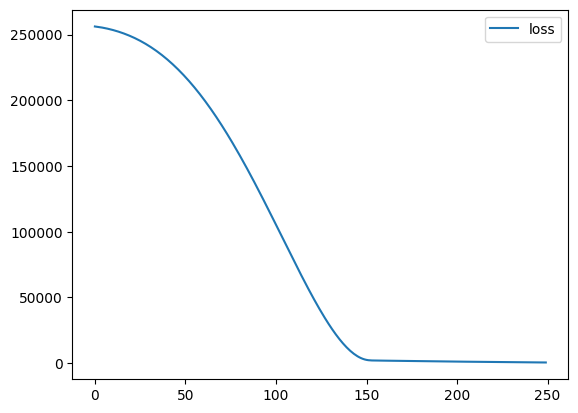

In [25]:
import matplotlib
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [26]:
model.evaluate(X_test, y_test, verbose=0)

490.4565734863281

In [27]:
model.evaluate(X_train, y_train, verbose=0)

503.4495849609375

In [28]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [29]:
test_predictions = test_predictions.reshape(-1,) ##  for 1d data

In [30]:
pred_df = pd.DataFrame({
    "True Price": y_test,
    "Predicted Price": test_predictions
})

pred_df.head()


,True Price,Predicted Price
0,402.296319,428.323395
1,624.156198,598.655212
2,582.455066,577.001709
3,578.588606,552.082336
4,371.224104,385.656647


<Axes: xlabel='True Price', ylabel='Predicted Price'>

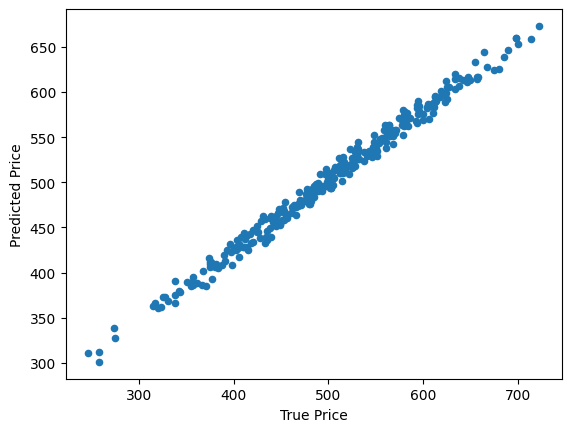

In [31]:
pred_df.plot.scatter(x="True Price", y="Predicted Price")

In [32]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(
    pred_df["True Price"],
    pred_df["Predicted Price"]
)
mae


17.464872631414085

In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(
    pred_df["True Price"],
    pred_df["Predicted Price"]
)
mse


490.45660207993893

In [34]:
rmse = np.sqrt(mse)
rmse


np.float64(22.146254809333765)

In [35]:
new_gem = [[998, 1000]]   # feature1, feature2
new_gem = scaler.transform(new_gem)

model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[427.95673]], dtype=float32)

In [36]:
model.save("my_gem_model.h5")


In [37]:
from tensorflow.keras.models import load_model

later_model = load_model(r'my_gem_model.h5', compile=False)
later_model.predict(new_gem)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[427.95673]], dtype=float32)

## Now using Adam optimizer


In [38]:
model2 = Sequential()
model2.add(Dense(4, activation='relu'))
model2.add(Dense(2, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

model2.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=32, epochs=250,) 

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 256903.4219 - val_loss: 259272.8281
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256773.4844 - val_loss: 259147.7031
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256653.7812 - val_loss: 259030.4531
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256538.4688 - val_loss: 258912.6875
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256417.5781 - val_loss: 258783.3594
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256279.9375 - val_loss: 258631.8906
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256116.4531 - val_loss: 258450.5938
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255920.7031 - val_loss: 258234.3125
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255688.8438 - val_loss: 257980.0781
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255418.2812 - val_loss: 257685.7812
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [43]:
losses =pd.DataFrame(model2.history.history)
losses

,loss,val_loss
0,256903.421875,259272.828125
1,256773.484375,259147.703125
2,256653.781250,259030.453125
3,256538.468750,258912.687500
4,256417.578125,258783.359375
...,...,...
245,1240.274292,1226.529785
246,1236.717407,1222.920776
247,1233.133789,1219.286743
248,1229.523804,1215.626099


<Axes: >

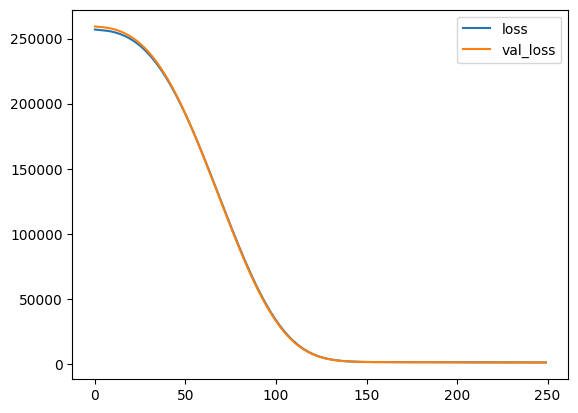

In [44]:
losses.plot()

## Then Ahead Same as previous one